# Test on Train

In [2]:
import os
import numpy as np
import os.path

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase

import nideep.eval.log_utils as lu
    # set up Python environment: numpy for numerical routines, and matplotlib for plotting
import h5py
import caffe
import sensSpec
from caffe.proto import caffe_pb2
from google.protobuf import text_format

soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
print_soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femS', 'fire',
       'footS', 'knock', 'phone', 'piano']

# 1. SigmoidCrossEntropy

**with dropout**

In [2]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/03/deploy_train.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/03/te'
it_list_SCE,sens_list_SCE,spec_list_SCE,bal_acclist_SCE = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/03/te_train',
                                                      s_flag=False,
                                                                                  threshold=0.5,
                                                      test_size=417888,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


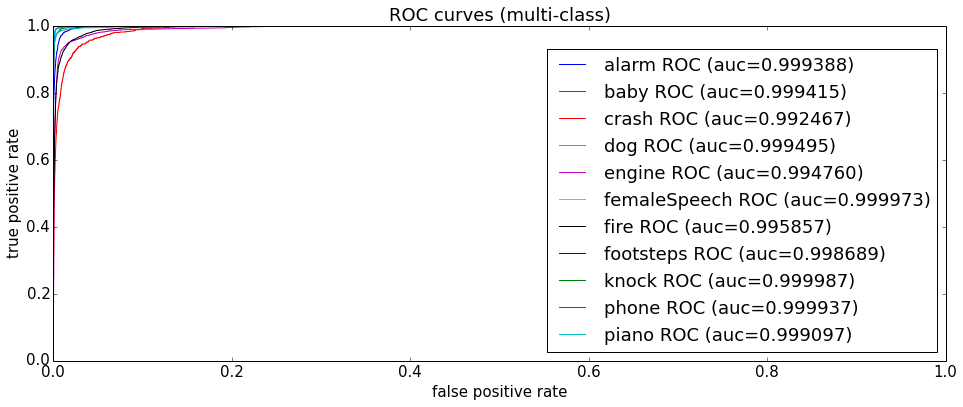

In [3]:
#plot roc_curve:
import roc_curve

soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
fpath = '/mnt/raid/dnn/cindy/modelfiles/03/te_train_iter_5000.hdf5'
key_est = 'predict'
thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)

In [4]:
sensSpec.printResult(print_soundTypes,sens_list_SCE,spec_list_SCE,bal_acclist_SCE)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.999742 	 0.999227 	 0.999484
baby 	 1.000000 	 0.999280 	 0.999640
crash 	 0.996755 	 0.998332 	 0.997544
dog 	 1.000000 	 0.999828 	 0.999914
engine 	 0.982397 	 0.997431 	 0.989914
femS 	 1.000000 	 0.999966 	 0.999983
fire 	 0.984352 	 0.998883 	 0.991617
footS 	 0.997100 	 0.999394 	 0.998247
knock 	 1.000000 	 0.999953 	 0.999977
phone 	 1.000000 	 0.999937 	 0.999969
piano 	 0.999139 	 0.999567 	 0.999353


**without dropout**

In [5]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/18/deploy_train.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/18/te'
it_list_SCE_nd,sens_list_SCE_nd,spec_list_SCE_nd,bal_acclist_SCE_nd = sensSpec.getSensSpecSCE(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/18/te_train',
                                                      s_flag=False,
                                                      test_size=417888,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


In [6]:
sensSpec.printResult(print_soundTypes,sens_list_SCE_nd,spec_list_SCE_nd,bal_acclist_SCE_nd)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 1.000000 	 0.999261 	 0.999631
baby 	 1.000000 	 0.999663 	 0.999832
crash 	 1.000000 	 0.999128 	 0.999564
dog 	 1.000000 	 0.999880 	 0.999940
engine 	 0.993166 	 0.997933 	 0.995549
femS 	 1.000000 	 0.999992 	 0.999996
fire 	 0.992334 	 0.999170 	 0.995752
footS 	 0.998162 	 0.999671 	 0.998917
knock 	 1.000000 	 0.999982 	 0.999991
phone 	 1.000000 	 0.999974 	 0.999987
piano 	 1.000000 	 0.999776 	 0.999888


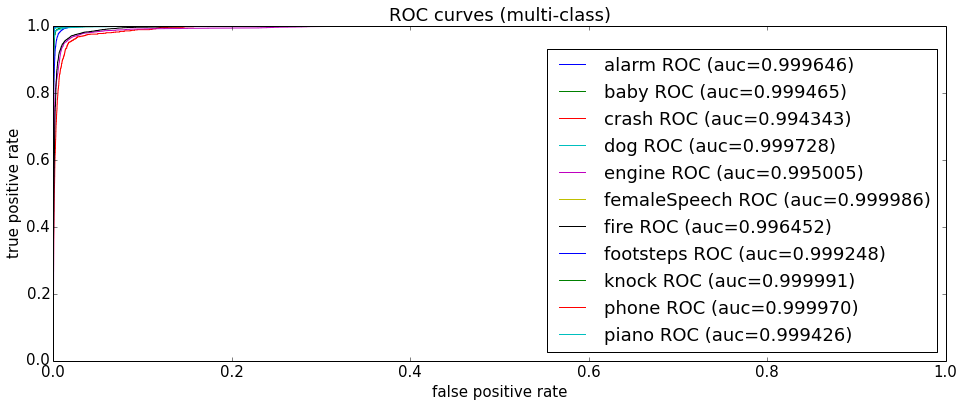

In [7]:
#plot roc_curve:
import roc_curve

soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
fpath = '/mnt/raid/dnn/cindy/modelfiles/18/te_train_iter_5000.hdf5'
key_est = 'predict'
thresholds = roc_curve.multi_class(fpath, key_est, key_label='label', classes=soundTypes)

## plotting

last iteration acc-measurements for alarm
	 SCE 	 SCE_ndrp 
sens 	 0.999742 	 1.000000
spec 	 0.999227 	 0.999261
bal 	 0.999484 	 0.999631
last iteration acc-measurements for baby
	 SCE 	 SCE_ndrp 
sens 	 1.000000 	 1.000000
spec 	 0.999280 	 0.999663
bal 	 0.999640 	 0.999832
last iteration acc-measurements for crash
	 SCE 	 SCE_ndrp 
sens 	 0.996755 	 1.000000
spec 	 0.998332 	 0.999128
bal 	 0.997544 	 0.999564
last iteration acc-measurements for dog
	 SCE 	 SCE_ndrp 
sens 	 1.000000 	 1.000000
spec 	 0.999828 	 0.999880
bal 	 0.999914 	 0.999940
last iteration acc-measurements for engine
	 SCE 	 SCE_ndrp 
sens 	 0.982397 	 0.993166
spec 	 0.997431 	 0.997933
bal 	 0.989914 	 0.995549
last iteration acc-measurements for femaleSpeech
	 SCE 	 SCE_ndrp 
sens 	 1.000000 	 1.000000
spec 	 0.999966 	 0.999992
bal 	 0.999983 	 0.999996
last iteration acc-measurements for fire
	 SCE 	 SCE_ndrp 
sens 	 0.984352 	 0.992334
spec 	 0.998883 	 0.999170
bal 	 0.991617 	 0.995752
last iteration a

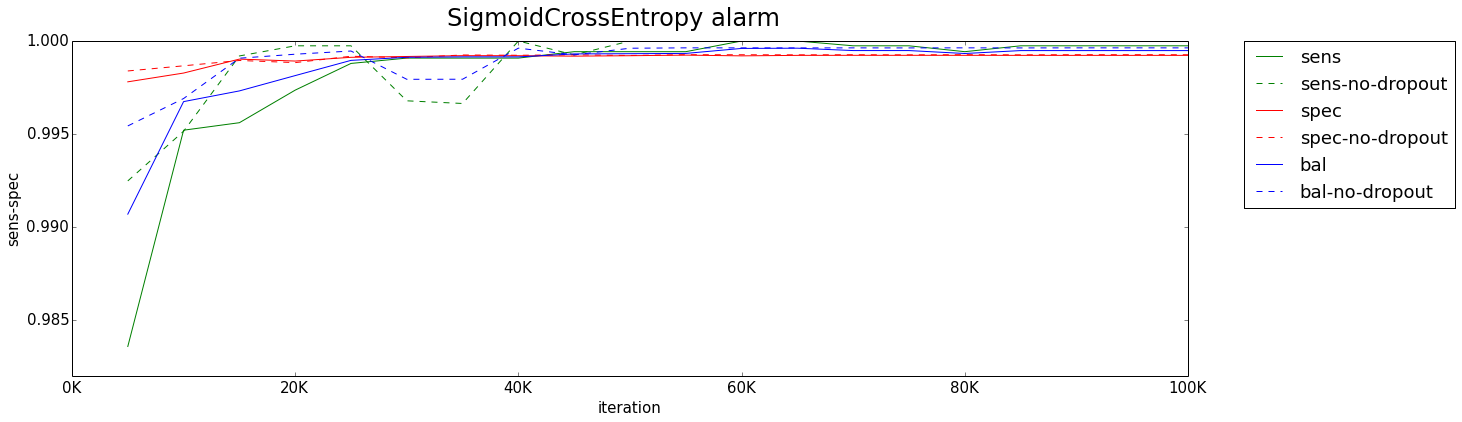

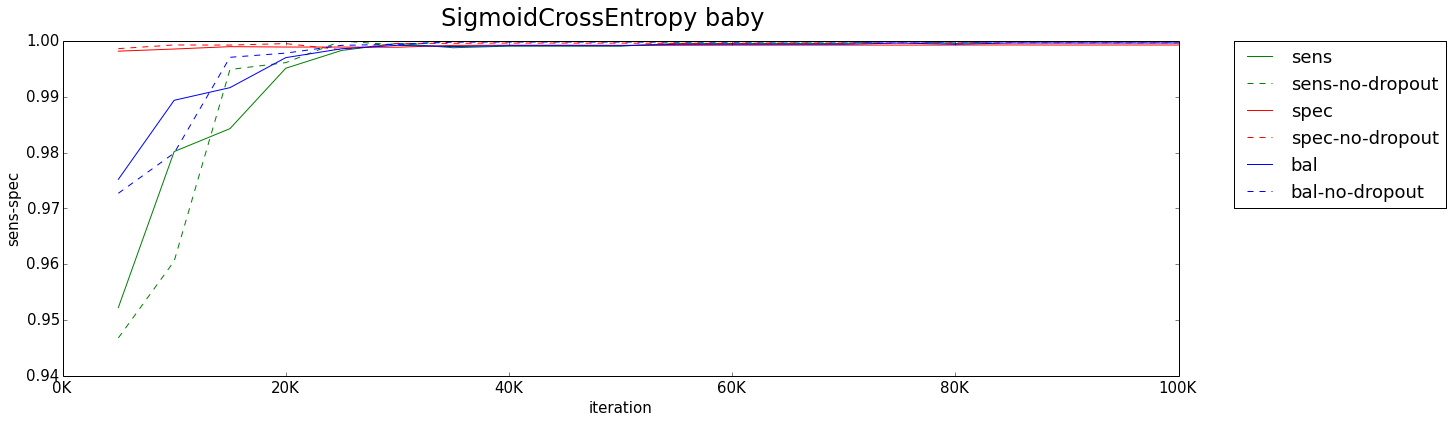

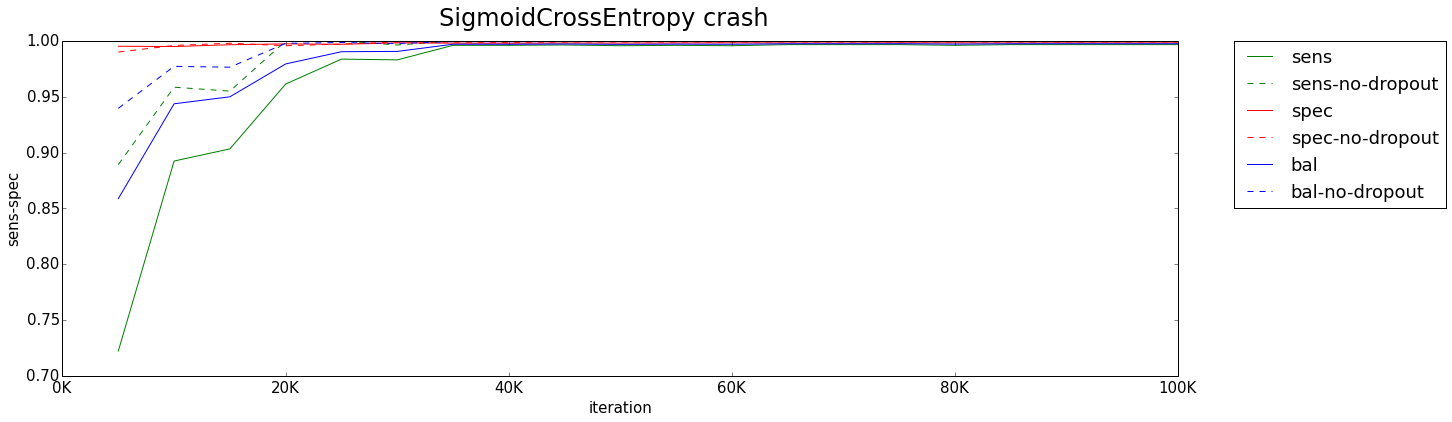

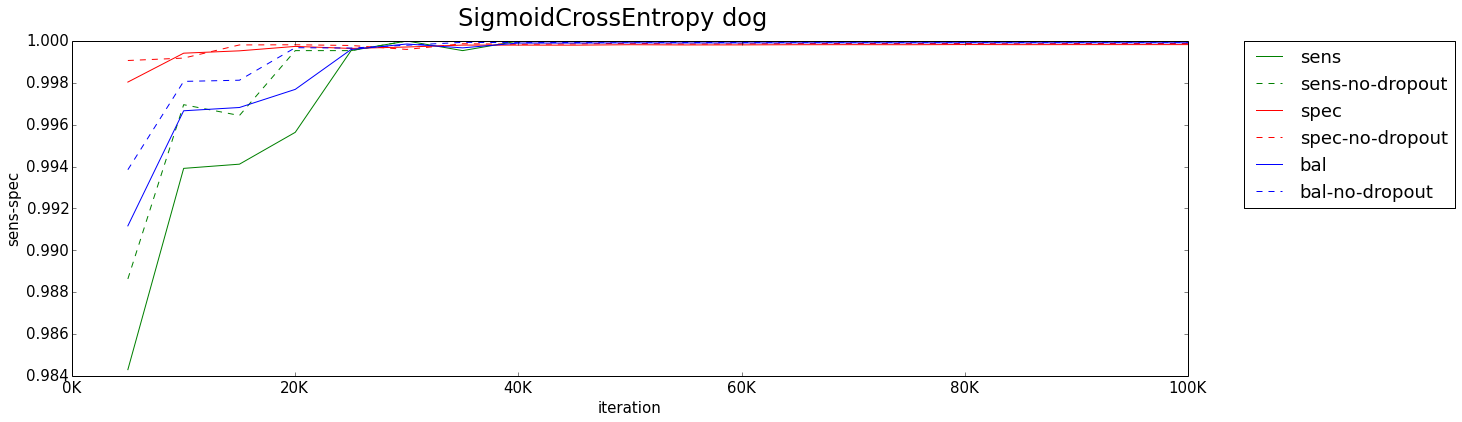

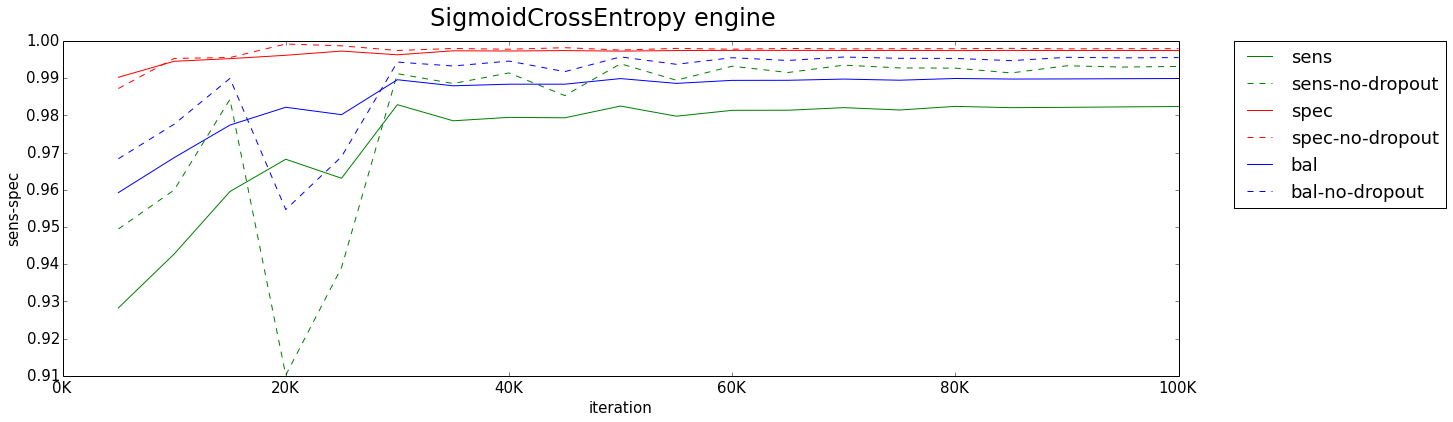

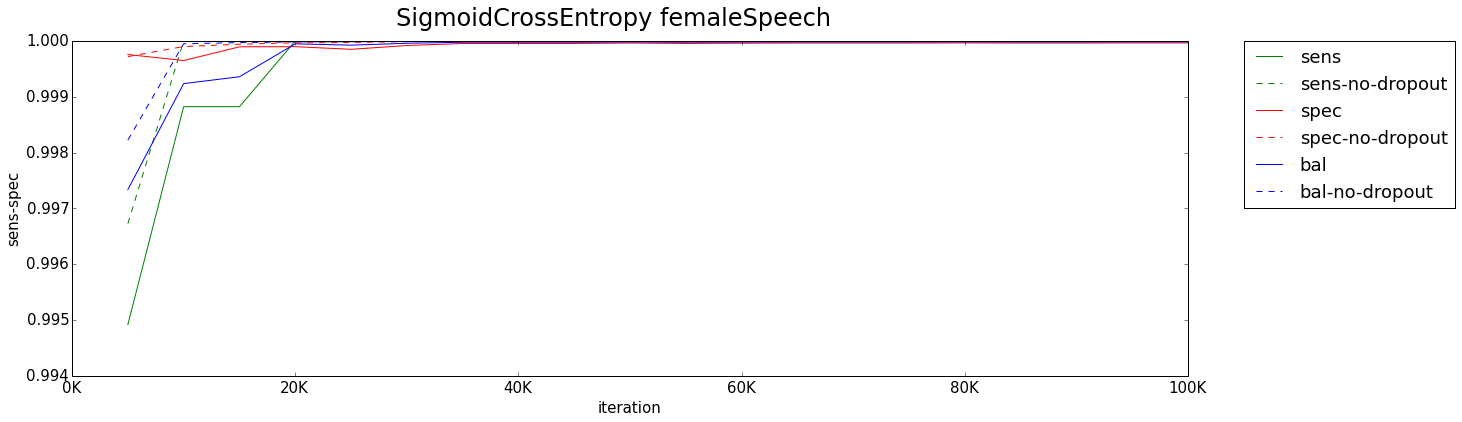

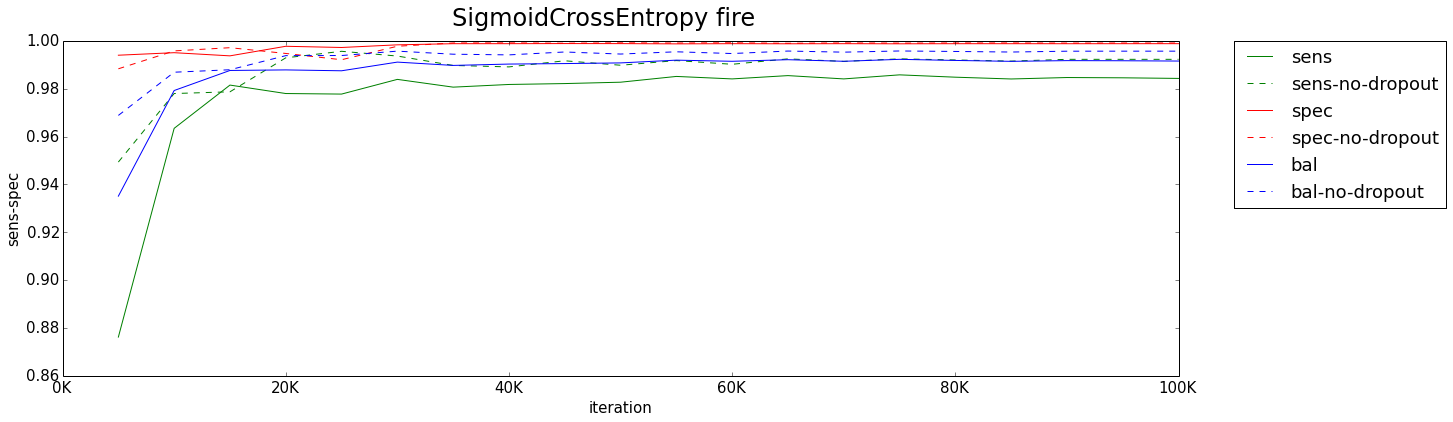

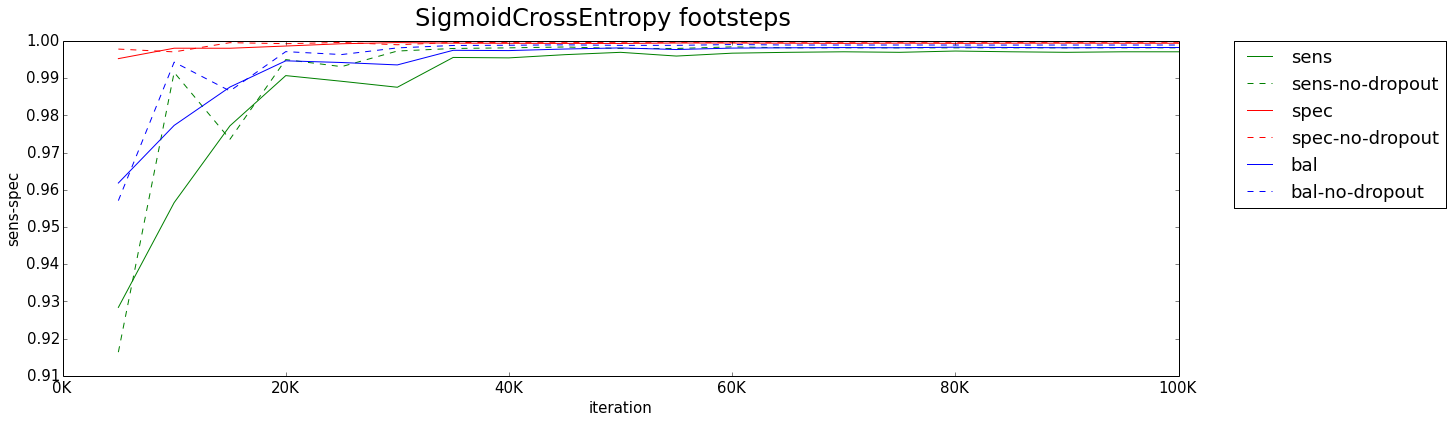

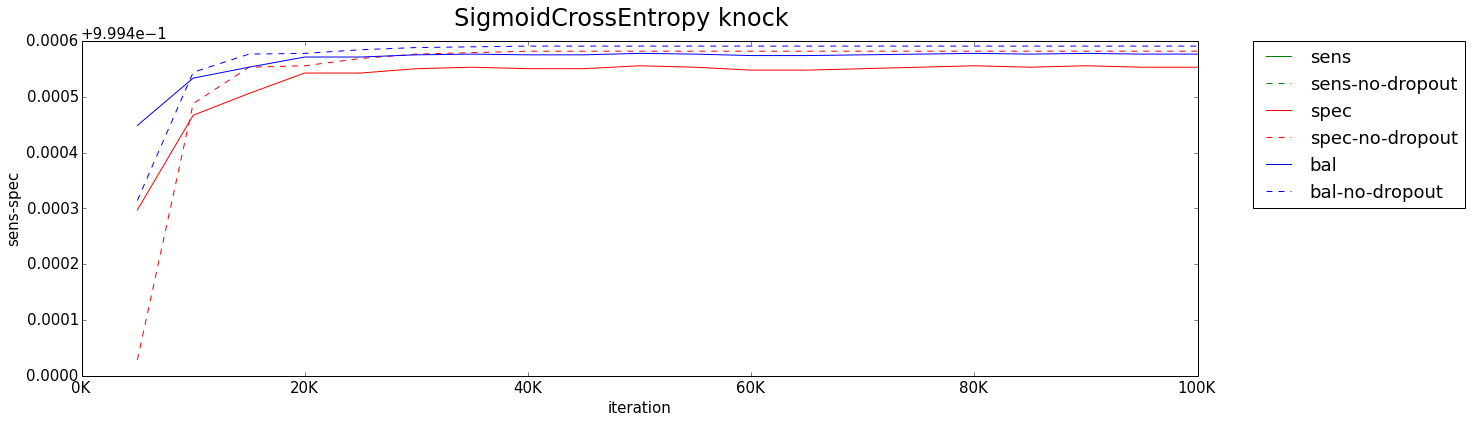

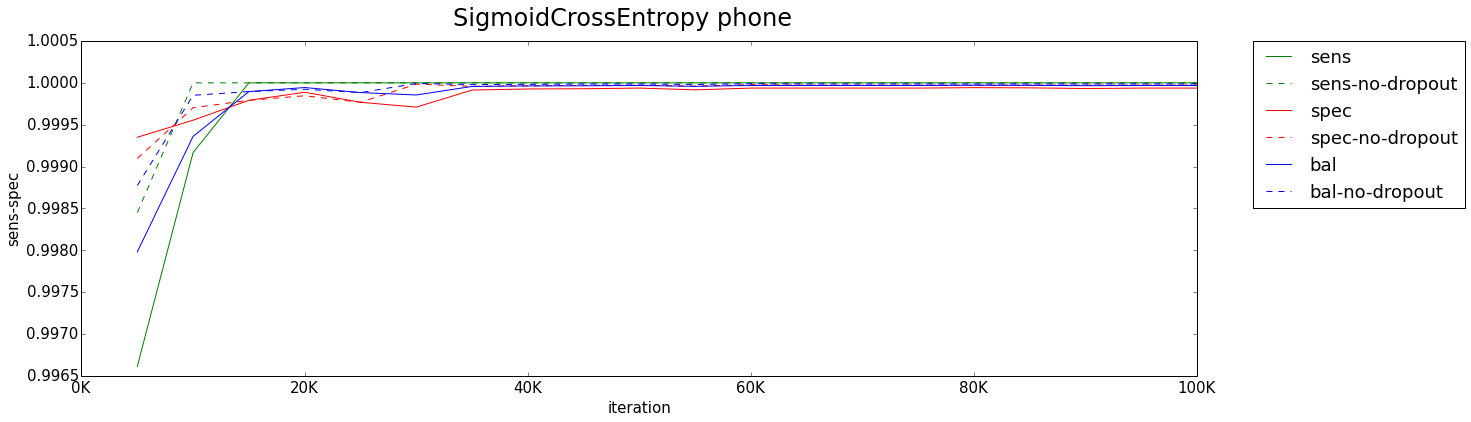

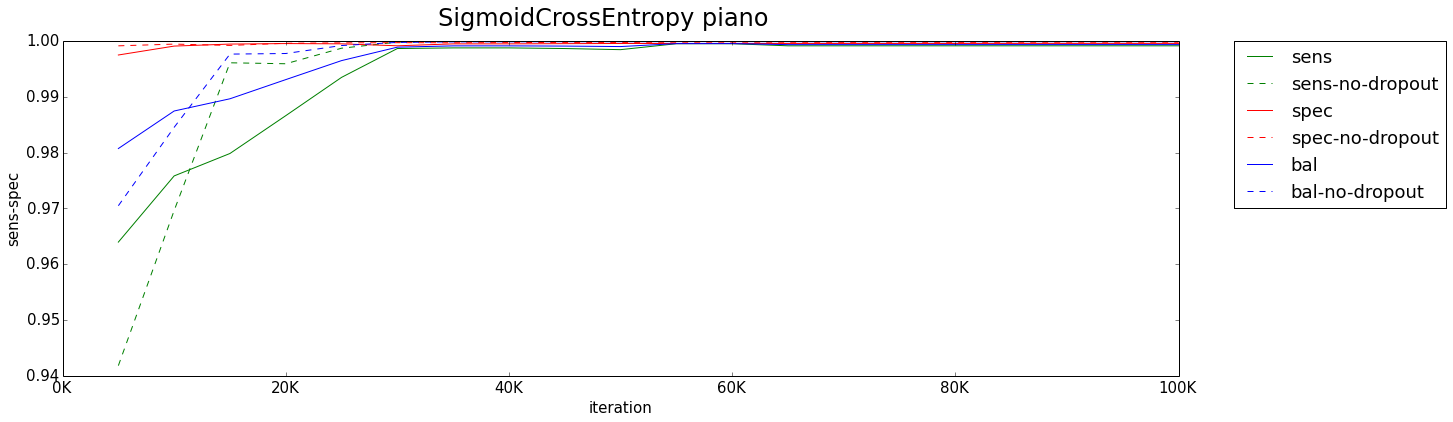

In [8]:
root_path = '/mnt/antares_raid/home/cindy/adhara/experiments/plots/SigmoidCrossEntropy/'

#####################plot#####################
K = len(soundTypes)  #get number of class labels
for s in range(K):
    plt.figure(figsize=(20,6))
    plt.suptitle('SigmoidCrossEntropy '+soundTypes[s],fontsize=24)
    
    plt.plot(it_list_SCE, sens_list_SCE[:,s],color='green',label='sens')
    plt.plot(it_list_SCE_nd, sens_list_SCE_nd[:,s],'--',color='green',label='sens-no-dropout')
    
    plt.plot(it_list_SCE, spec_list_SCE[:,s], color='red',label='spec')
    plt.plot(it_list_SCE_nd, spec_list_SCE_nd[:,s], '--',color='red',label='spec-no-dropout')
    
    plt.plot(it_list_SCE, bal_acclist_SCE[:,s],color='blue',label='bal')
    plt.plot(it_list_SCE_nd, bal_acclist_SCE_nd[:,s], '--',color='blue',label='bal-no-dropout')
    
    plt.xlabel('iteration')
    plt.ylabel('sens-spec')
    # format x-axis ticks
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

#     plt.legend(loc=0,prop={'size':15})
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
    plt.savefig(root_path+'acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')
    
    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
    print '\t SCE \t SCE_ndrp '
    print 'sens \t %f \t %f'%(sens_list_SCE[-1,s],sens_list_SCE_nd[-1,s])
    print 'spec \t %f \t %f'%(spec_list_SCE[-1,s],spec_list_SCE_nd[-1,s])
    print 'bal \t %f \t %f'%(bal_acclist_SCE[-1,s],bal_acclist_SCE_nd[-1,s])

# 2. SoftmaxWithLoss

**with dropout**

In [3]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/models_grouptalk_1/deploy_train.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/jm/dnn_clean/models_grouptalk_1/gt_1'
it_list,sens_list,spec_list,bal_acclist = sensSpec.getSensSpec(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/grouptalk/te_train',
                                                      s_flag=False,
                                                      test_size=417888,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


In [4]:
sensSpec.printResult(print_soundTypes,sens_list,spec_list,bal_acclist)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.999742 	 0.999261 	 0.999501
baby 	 1.000000 	 0.999415 	 0.999708
crash 	 0.998507 	 0.998747 	 0.998627
dog 	 0.999225 	 0.999843 	 0.999534
engine 	 0.988542 	 0.997468 	 0.993005
femS 	 1.000000 	 0.999990 	 0.999995
fire 	 0.985529 	 0.999269 	 0.992399
footS 	 0.996813 	 0.999624 	 0.998218
knock 	 1.000000 	 0.999977 	 0.999988
phone 	 1.000000 	 0.999956 	 0.999978
piano 	 0.999110 	 0.999619 	 0.999364


**without dropout**

In [5]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/16/deploy_acc_train.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/16/te'
it_list_nd,sens_list_nd,spec_list_nd,bal_acclist_nd = sensSpec.getSensSpec(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/16/te_train',
                                                      s_flag=False,
                                                      test_size=417888,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


In [6]:
sensSpec.printResult(print_soundTypes,sens_list,spec_list,bal_acclist)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.999742 	 0.999261 	 0.999501
baby 	 1.000000 	 0.999415 	 0.999708
crash 	 0.998507 	 0.998747 	 0.998627
dog 	 0.999225 	 0.999843 	 0.999534
engine 	 0.988542 	 0.997468 	 0.993005
femS 	 1.000000 	 0.999990 	 0.999995
fire 	 0.985529 	 0.999269 	 0.992399
footS 	 0.996813 	 0.999624 	 0.998218
knock 	 1.000000 	 0.999977 	 0.999988
phone 	 1.000000 	 0.999956 	 0.999978
piano 	 0.999110 	 0.999619 	 0.999364


# 3. SoftmaxWithLoss(One-Against-All)

**with dropout**

In [6]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/15/deploy_train.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/15/te'
it_list_ns,sens_list_ns,spec_list_ns,bal_acclist_ns = sensSpec.getSensSpecNoSlicing(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/15/te_train',
                                                      s_flag=False,
                                                      test_size=417888,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


In [9]:
sensSpec.printResult(print_soundTypes,sens_list_ns,spec_list_ns,bal_acclist_ns)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.999742 	 0.999186 	 0.999464
baby 	 0.999713 	 0.999201 	 0.999457
crash 	 0.998507 	 0.997499 	 0.998003
dog 	 1.000000 	 0.999742 	 0.999871
engine 	 0.989232 	 0.997040 	 0.993136
femS 	 1.000000 	 0.999927 	 0.999963
fire 	 0.989003 	 0.999024 	 0.994013
footS 	 0.998335 	 0.999285 	 0.998810
knock 	 1.000000 	 0.999885 	 0.999943
phone 	 1.000000 	 0.999945 	 0.999973
piano 	 0.999196 	 0.999379 	 0.999287


**without dropout**

In [14]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/17/deploy_train.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/17/te'
it_list_nn,sens_list_nn,spec_list_nn,bal_acclist_nn = sensSpec.getSensSpecNoSlicing(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/17/te_train',
                                                      s_flag=False,
                                                      test_size=417888,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


In [15]:
sensSpec.printResult(print_soundTypes,sens_list_nn,spec_list_nn,bal_acclist_nn)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 1.000000 	 0.999193 	 0.999597
baby 	 1.000000 	 0.999642 	 0.999821
crash 	 1.000000 	 0.998771 	 0.999385
dog 	 1.000000 	 0.999885 	 0.999943
engine 	 0.995147 	 0.997659 	 0.996403
femS 	 1.000000 	 0.999987 	 0.999993
fire 	 0.994057 	 0.999261 	 0.996659
footS 	 0.998880 	 0.999666 	 0.999273
knock 	 1.000000 	 0.999940 	 0.999970
phone 	 1.000000 	 0.999974 	 0.999987
piano 	 1.000000 	 0.999713 	 0.999856


### Plotting

last iteration acc-measurements for alarm
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.999742 	 1.000000 	 0.999742 	 1.000000
spec 	 0.999261 	 0.999253 	 0.999186 	 0.999193
bal 	 0.999501 	 0.999627 	 0.999464 	 0.999597
last iteration acc-measurements for baby
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 1.000000 	 1.000000 	 0.999713 	 1.000000
spec 	 0.999415 	 0.999702 	 0.999201 	 0.999642
bal 	 0.999708 	 0.999851 	 0.999457 	 0.999821
last iteration acc-measurements for crash
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.998507 	 1.000000 	 0.998507 	 1.000000
spec 	 0.998747 	 0.999212 	 0.997499 	 0.998771
bal 	 0.998627 	 0.999606 	 0.998003 	 0.999385
last iteration acc-measurements for dog
	 drp-slc 	 ndrp-slc 	 drp-nslc 	 ndrp-nslc
sens 	 0.999225 	 1.000000 	 1.000000 	 1.000000
spec 	 0.999843 	 0.999922 	 0.999742 	 0.999885
bal 	 0.999534 	 0.999961 	 0.999871 	 0.999943
last iteration acc-measurements for engine
	 drp-slc 	 ndrp-slc 	 drp-nslc 

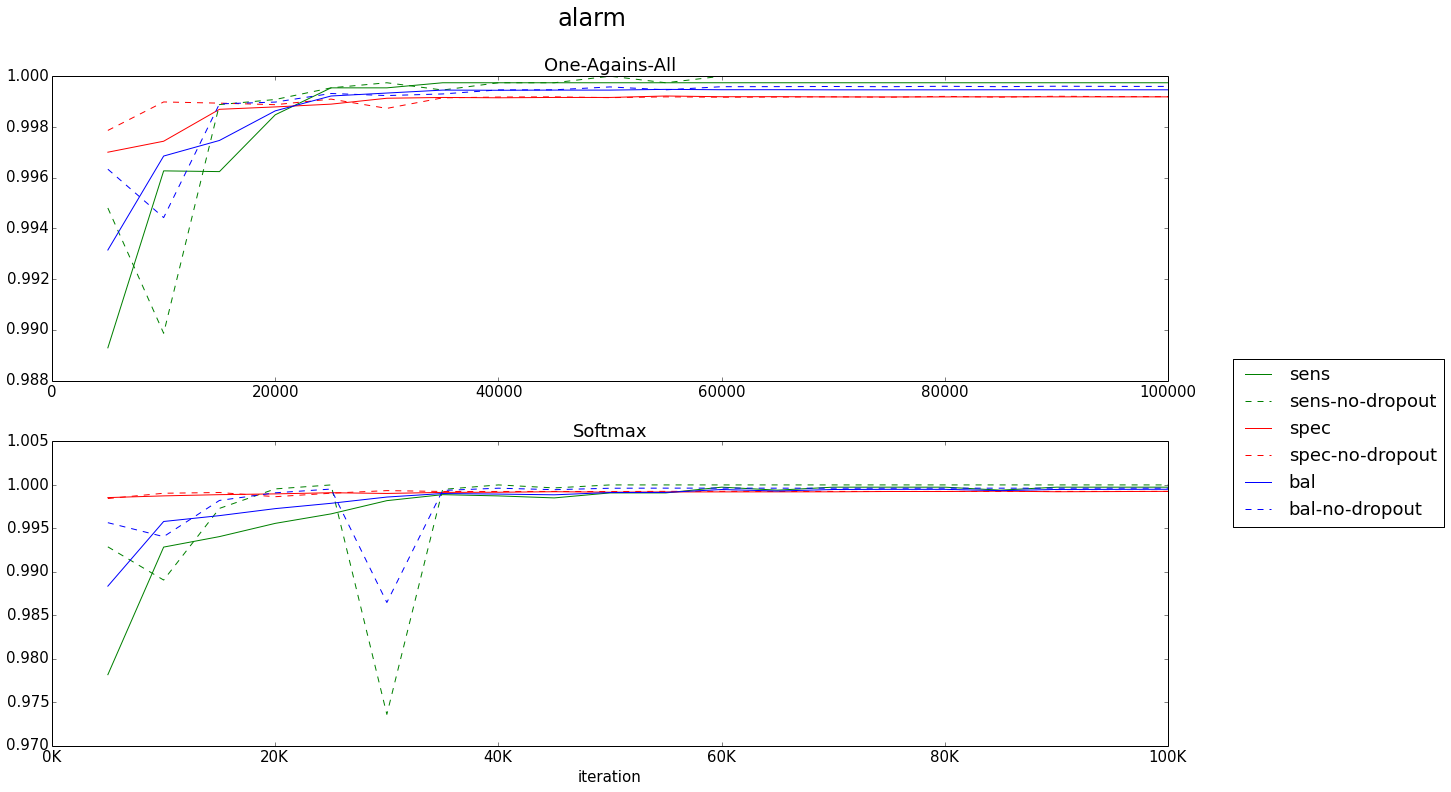

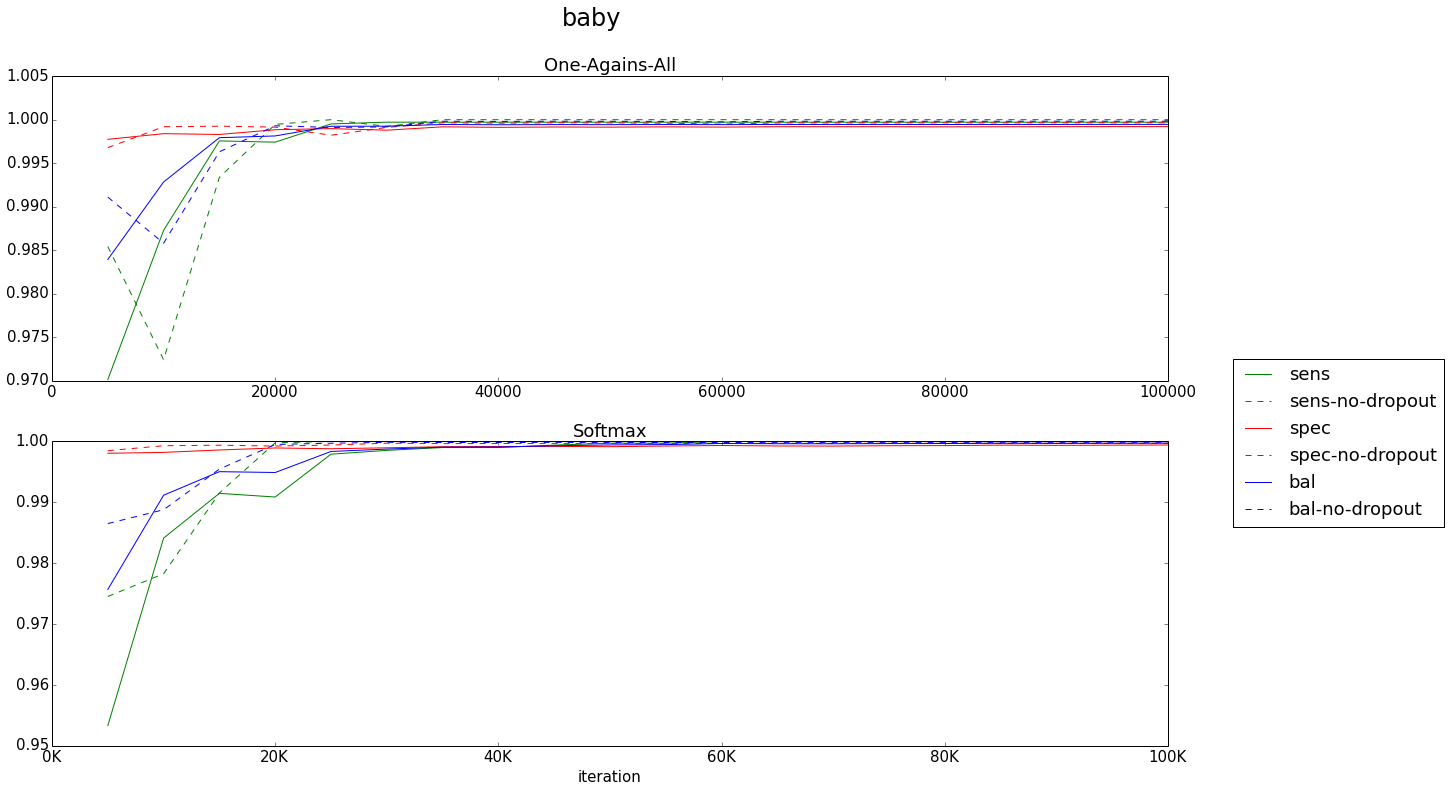

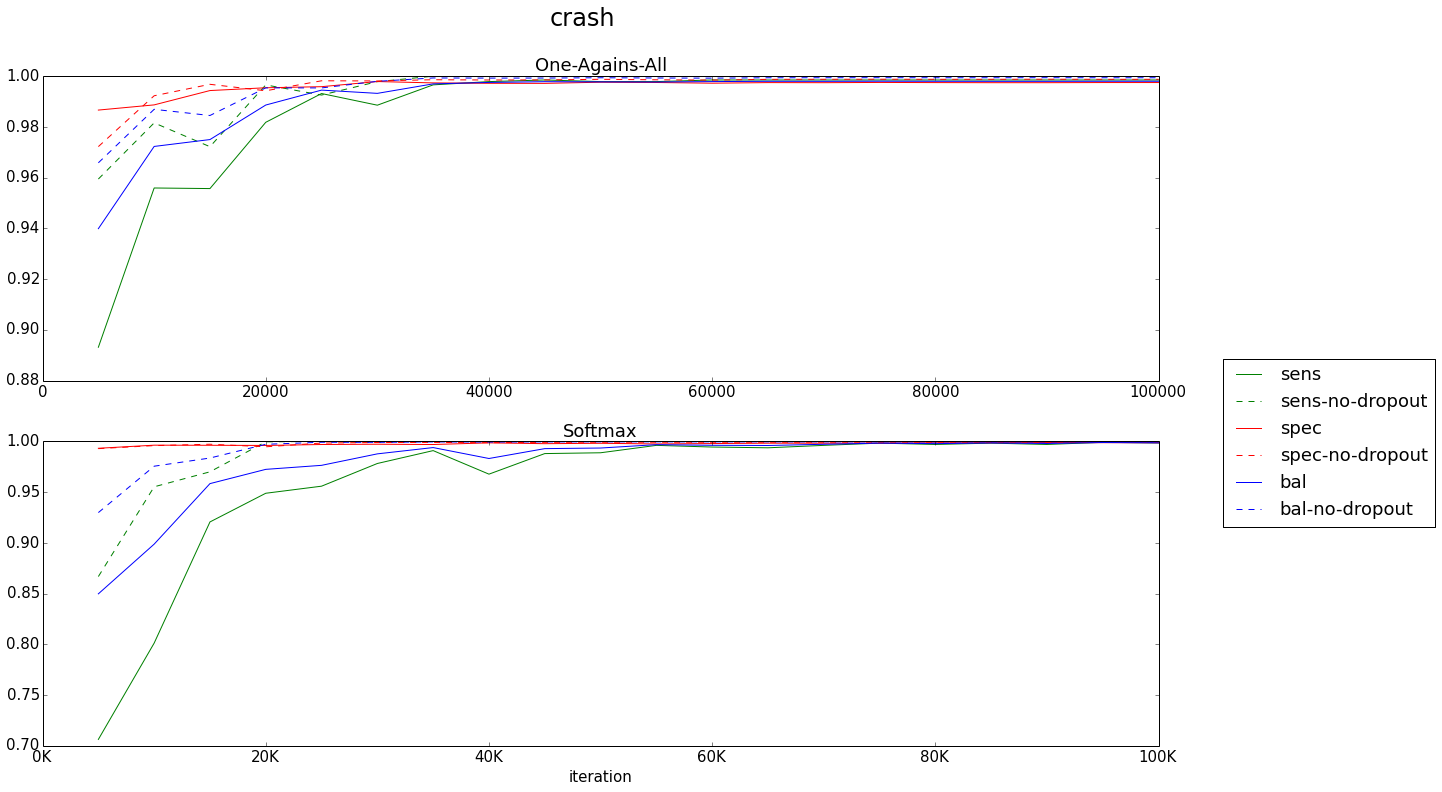

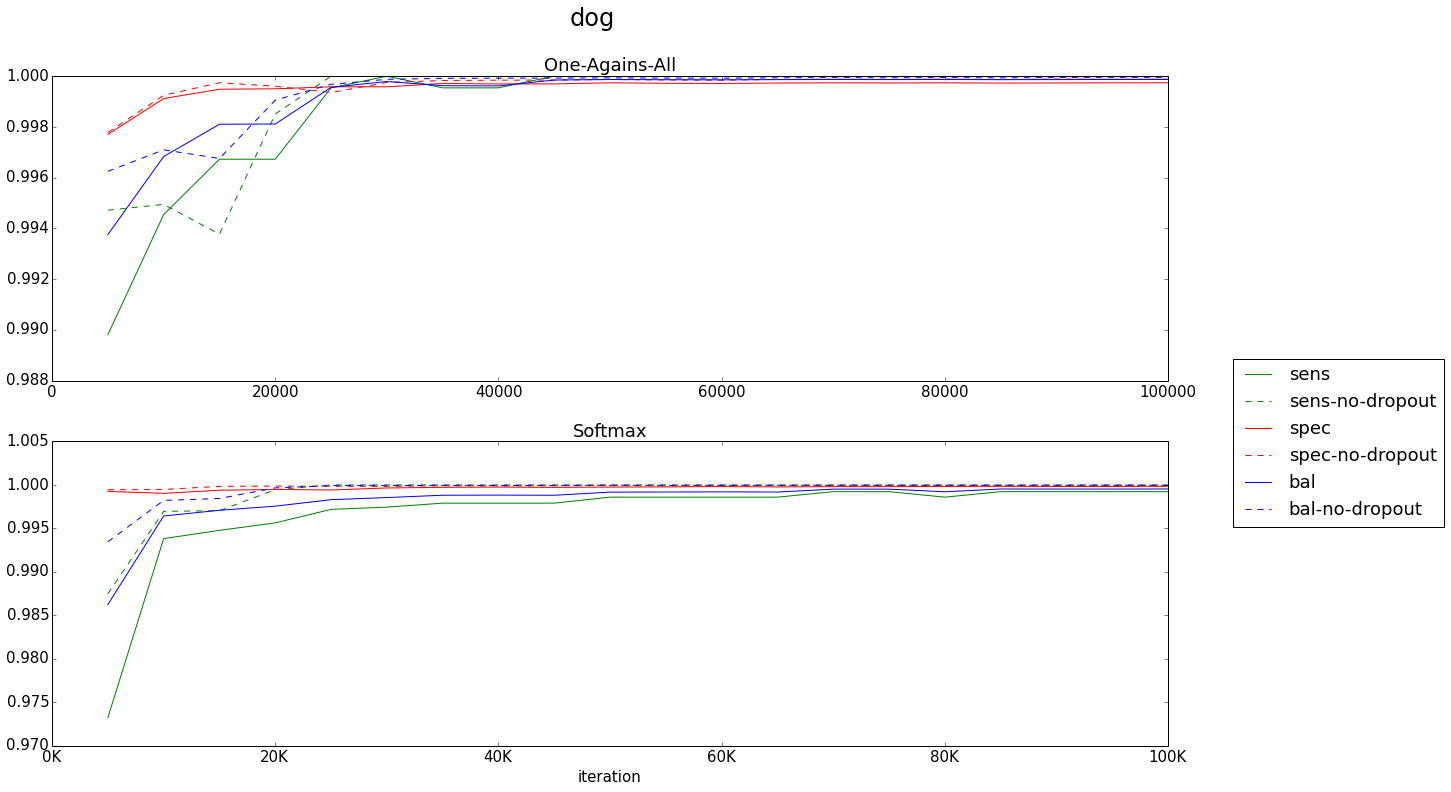

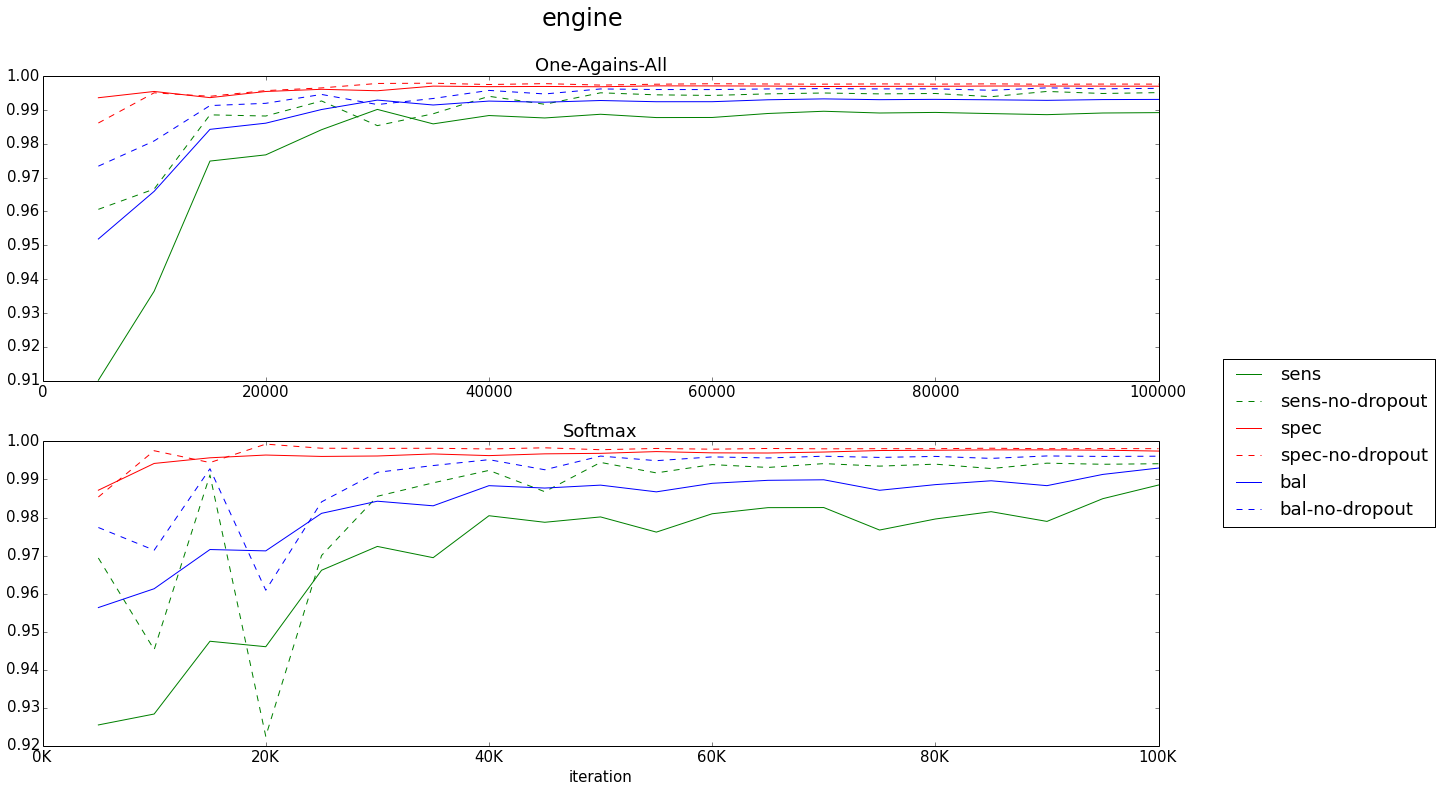

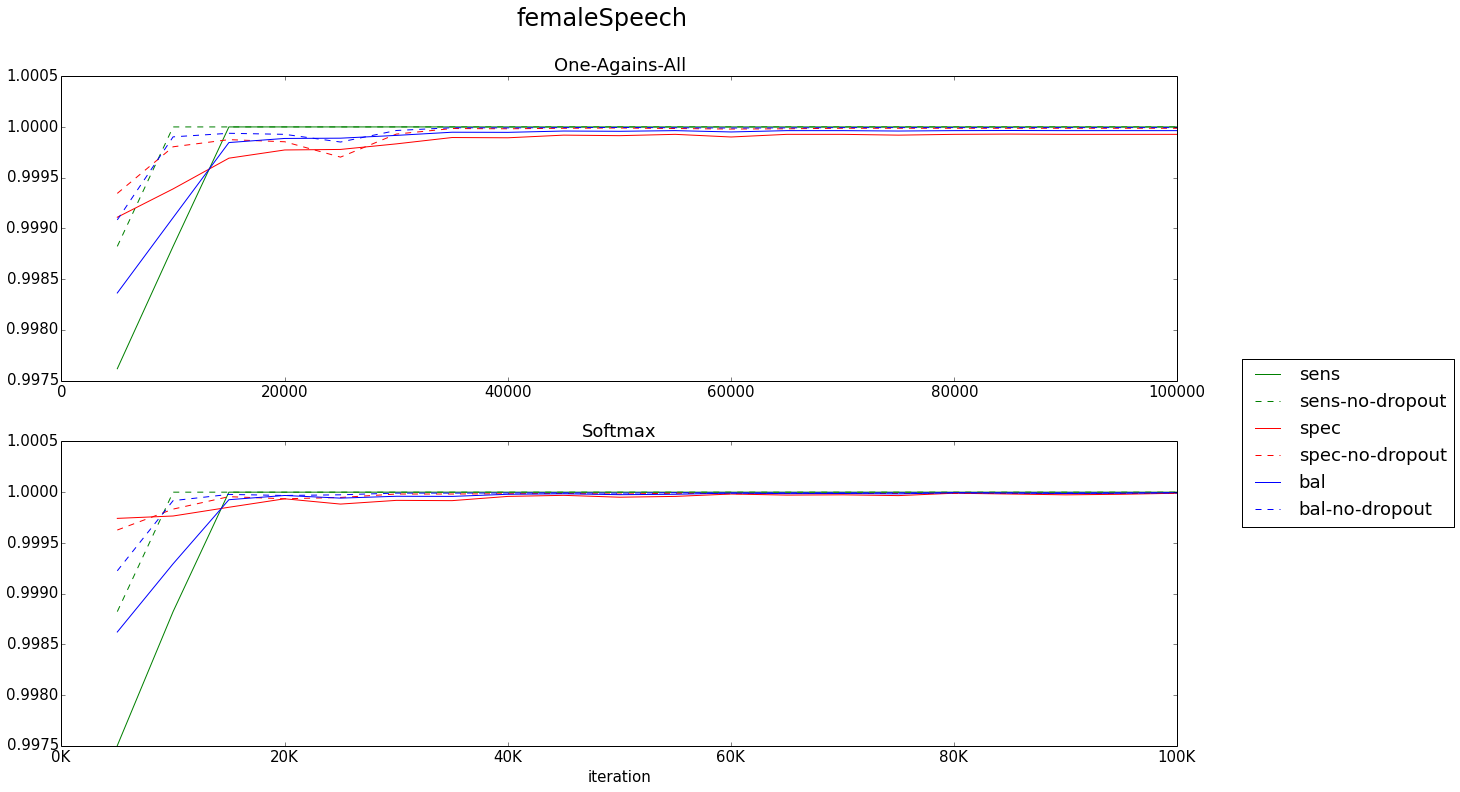

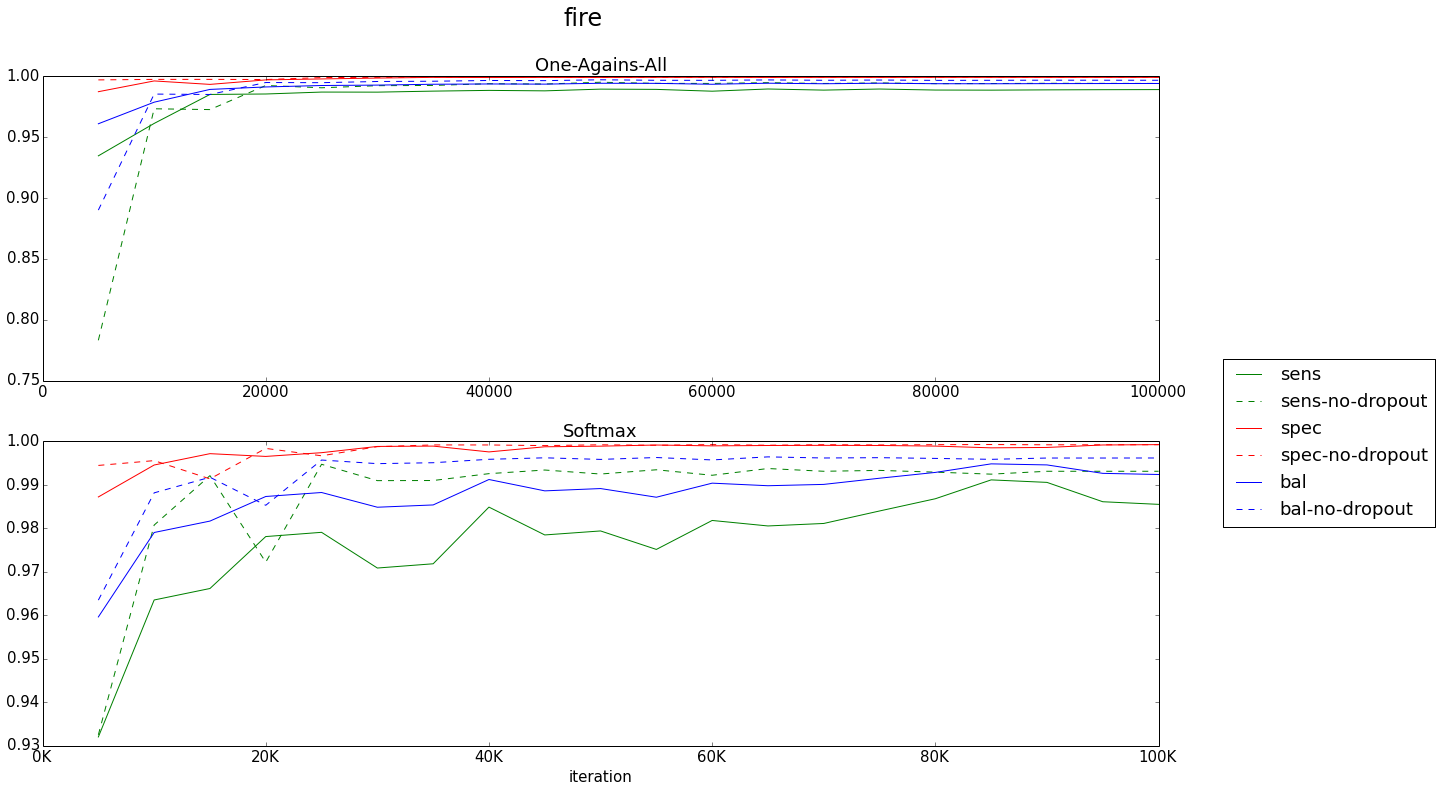

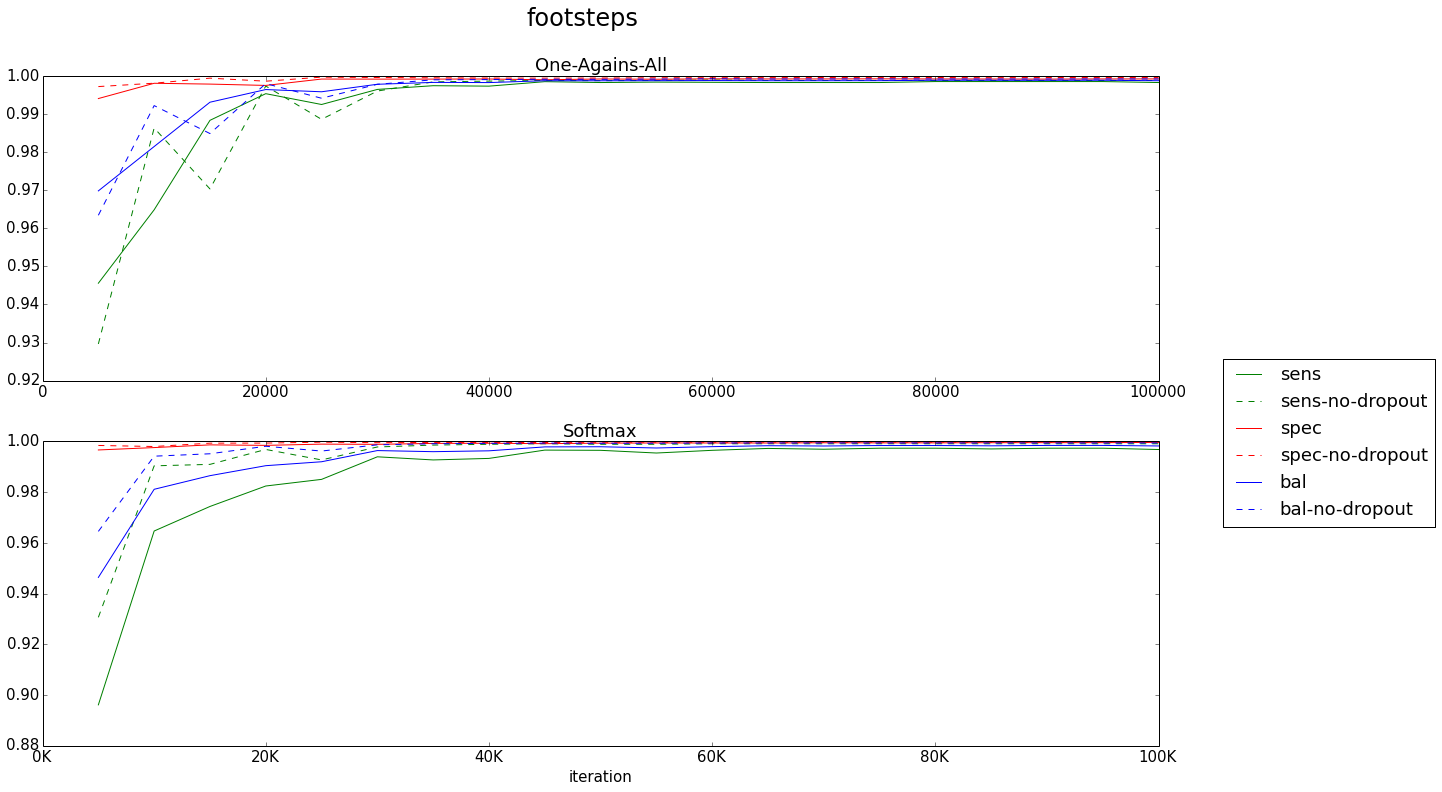

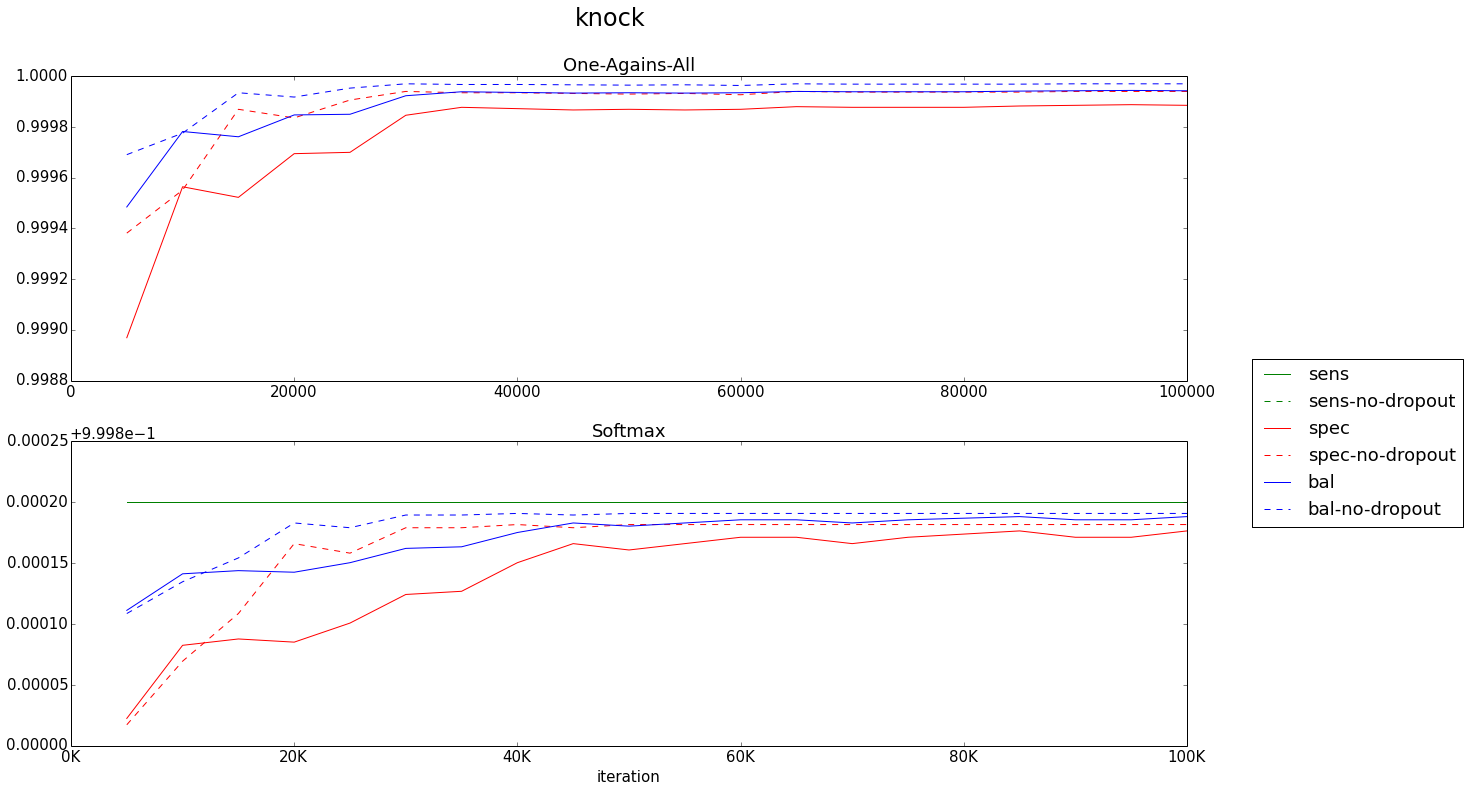

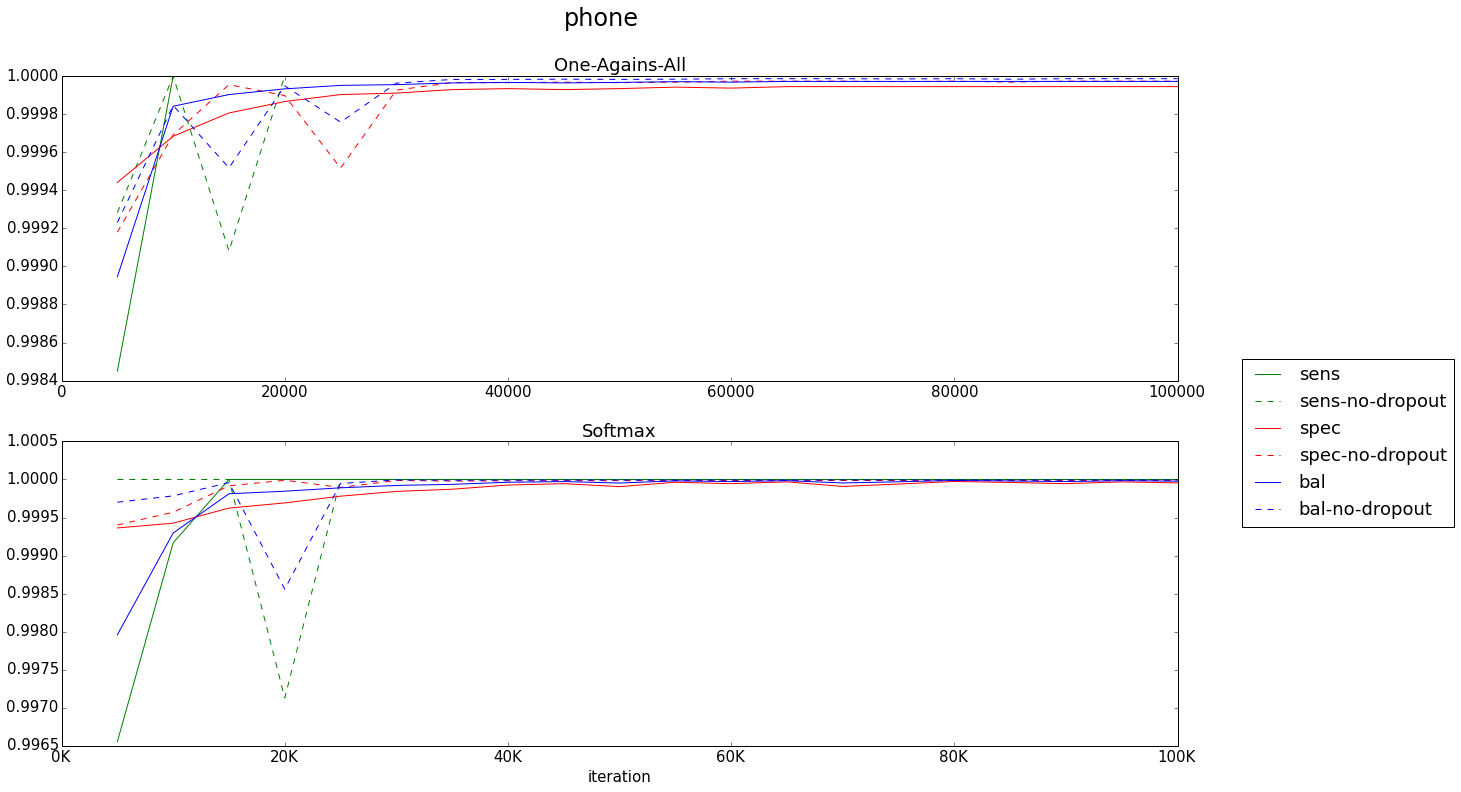

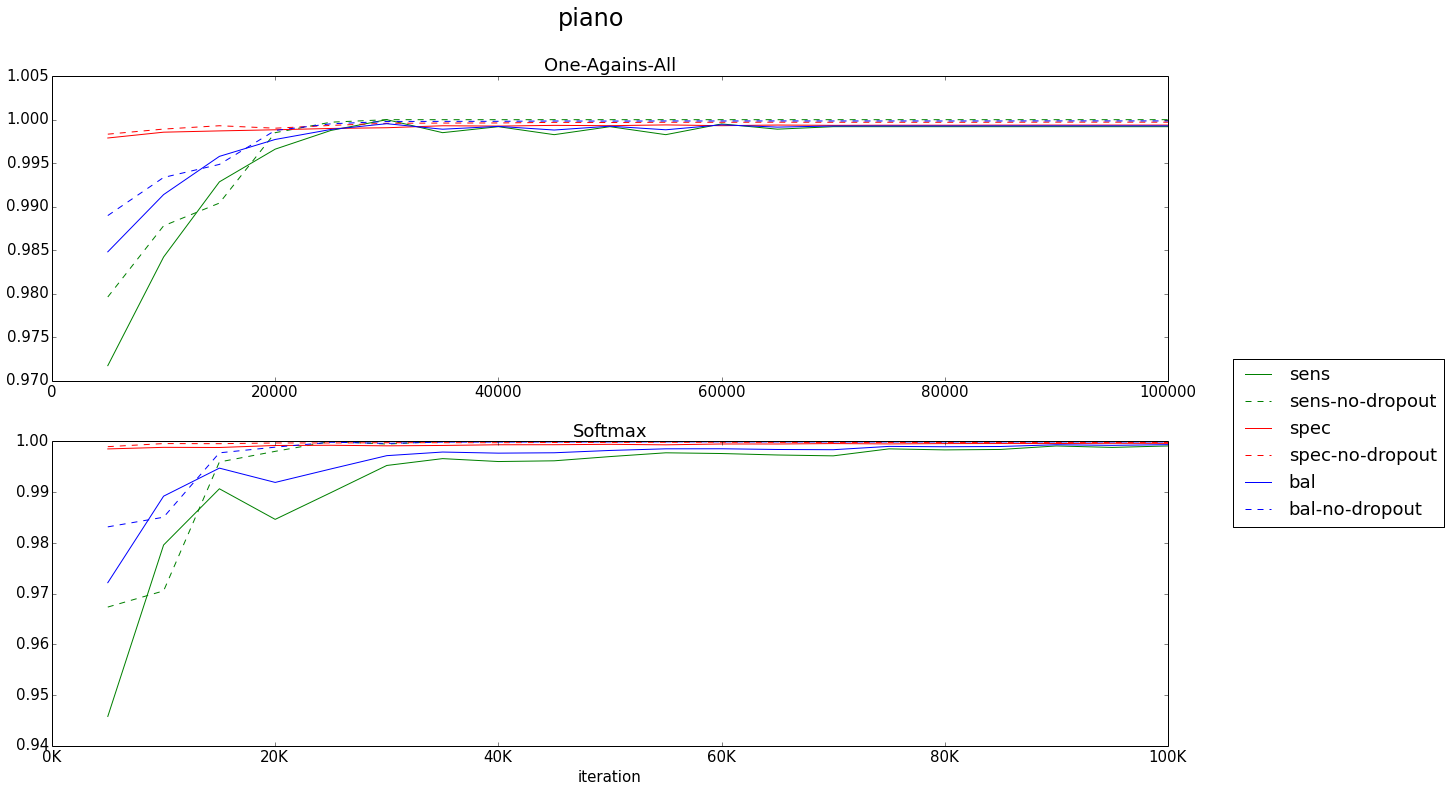

In [16]:
# root_path = '/mnt/antares_raid/home/cindy/adhara/experiments/plots/SoftmaxWithLoss/'

#####################plot#####################
K = len(soundTypes)  #get number of class labels
for s in range(K):
    fig = plt.figure(figsize=(20,12))
    fig.suptitle(soundTypes[s],fontsize=24)

    # Returns the Axes instance
    ax = fig.add_subplot(211) 
    ax2 = fig.add_subplot(212) 
    
    ax.set_title('One-Agains-All',fontsize=18)
    
    ax.plot(it_list_ns, sens_list_ns[:,s],color='green',label='sens')
    ax.plot(it_list_nn, sens_list_nn[:,s],'--',color='green',label='sens-no-dropout')
    
    ax.plot(it_list_ns, spec_list_ns[:,s], color='red',label='spec')
    ax.plot(it_list_nn, spec_list_nn[:,s], '--',color='red',label='spec-no-dropout')
    
    ax.plot(it_list_ns, bal_acclist_ns[:,s],color='blue',label='bal')
    ax.plot(it_list_nn, bal_acclist_nn[:,s], '--',color='blue',label='bal-no-dropout')
    
    
    ax2.set_title('Softmax',fontsize=18)
    
    ax2.plot(it_list, sens_list[:,s],color='green', label='sens')
    ax2.plot(it_list_nd, sens_list_nd[:,s],'--',color='green',label='sens-no-dropout')
    
    ax2.plot(it_list, spec_list[:,s], color='red',label='spec')
    ax2.plot(it_list_nd, spec_list_nd[:,s], '--',color='red',label='spec-no-dropout')
    
    ax2.plot(it_list, bal_acclist[:,s], color='blue',label='bal')
    ax2.plot(it_list_nd, bal_acclist_nd[:,s], '--',color='blue',label='bal-no-dropout')
    
    
    ax2.set_xlabel('iteration')
    # format x-axis ticks
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

#     plt.legend(loc=0,prop={'size':15})
    plt.legend(bbox_to_anchor=(1.05,1.3), loc=0,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
#     plt.savefig(root_path+'/acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')
    
    # print the values from last iteration
    print 'last iteration acc-measurements for %s'%soundTypes[s]
    print '\t drp-slc \t ndrp-slc \t drp-nslc \t ndrp-nslc'
    print 'sens \t %f \t %f \t %f \t %f'%(sens_list[-1,s],sens_list_nd[-1,s],sens_list_ns[-1,s],sens_list_nn[-1,s])
    print 'spec \t %f \t %f \t %f \t %f'%(spec_list[-1,s],spec_list_nd[-1,s],spec_list_ns[-1,s],spec_list_nn[-1,s])
    print 'bal \t %f \t %f \t %f \t %f'%(bal_acclist[-1,s],bal_acclist_nd[-1,s],bal_acclist_ns[-1,s],bal_acclist_nn[-1,s])